# [**Méthodes d'apprentissage des variétés sur une sphère sectionnée**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/2_2_manifold/plot_manifold_sphere.ipynb)<br/>([_Manifold Learning methods on a severed sphere_](https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html))

Une application des différentes techniques d'[**apprentissage des variétés** (2.2)](https://scikit-learn.org/stable/modules/manifold.html#manifold) sur un ensemble de données sphériques. Ici, on peut observer l'utilisation de la réduction de la dimensionnalité afin de gagner une certaine intuition concernant les méthodes d'apprentissage des variétés. En ce qui concerne l'ensemble de données, les pôles sont coupés de la sphère, ainsi qu'une fine tranche le long de son côté. Cela permet aux techniques d'apprentissage des variétés de "l'ouvrir" tout en la projetant sur deux dimensions.

Pour un exemple similaire, où les méthodes sont appliquées à l'ensemble de données en forme de S, voir [**Comparaison des méthodes d'apprentissage des variétés**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/2_2_manifold/plot_compare_methods.ipynb).

Notez que l'objectif du [**Scaling multidimensionnel (MDS)** (2.2.8)](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling) est de trouver une représentation en basse dimension des données (ici 2D) dans laquelle les distances respectent bien les distances de l'espace original en haute dimension, contrairement à d'autres algorithmes d'apprentissage des variétés, il ne cherche pas une représentation isotrope des données dans l'espace en basse dimension. Ici, le problème de la variété correspond assez bien à celui de représenter une carte plate de la Terre, comme avec une [**projection cartographique**](https://en.wikipedia.org/wiki/Map_projection).

standard: 0.11 sec
ltsa: 0.13 sec
hessian: 0.18 sec
modified: 0.13 sec
ISO: 0.23 sec
MDS: 1.5 sec
Spectral Embedding: 0.1 sec
t-SNE: 2.7 sec


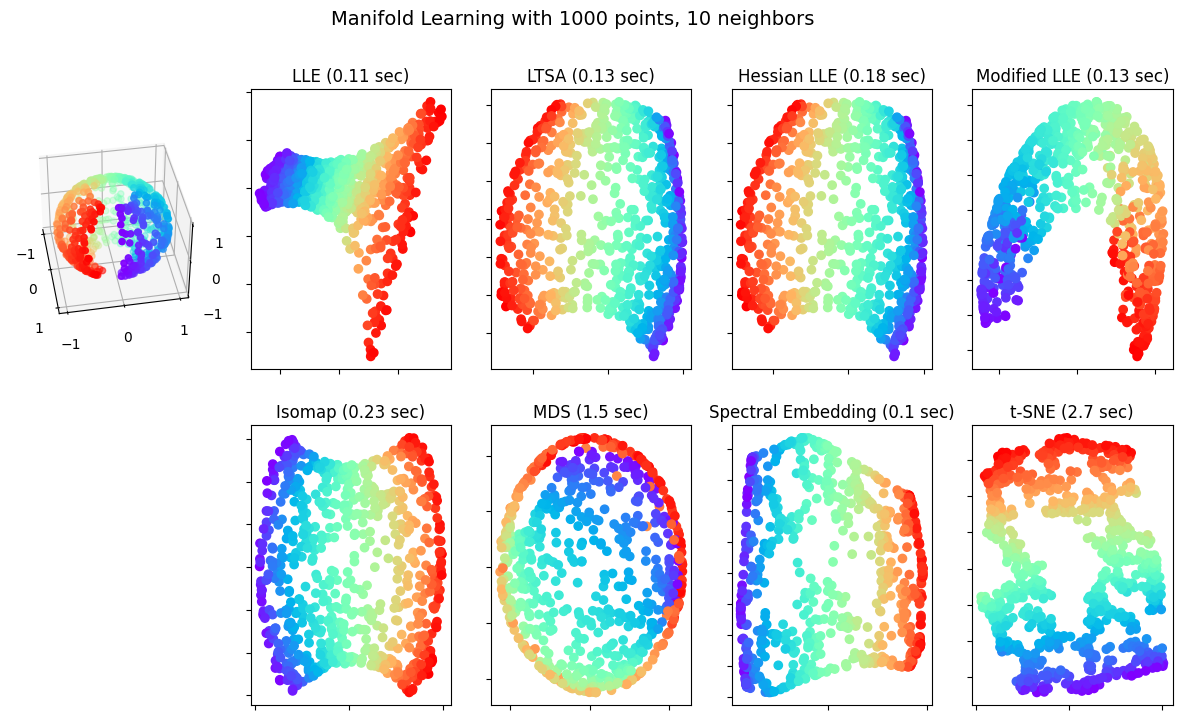

In [1]:
# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

from time import time

import matplotlib.pyplot as plt

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1, normalized_stress="auto")
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()